In [56]:
!pip install pandas
!pip install PySastrawi
!pip install matplotlib
!pip install seaborn
!pip install networkx
!pip install scipy

     ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/42.2 MB 1.8 MB/s eta 0:00:24
     ---------------------------------------- 0.3/42.2 MB 2.9 MB/s eta 0:00:15
      --------------------------------------- 0.7/42.2 MB 4.9 MB/s eta 0:00:09
     - -------------------------------------- 1.3/42.2 MB 6.9 MB/s eta 0:00:06
     - -------------------------------------- 2.0/42.2 MB 9.0 MB/s eta 0:00:05
     - -------------------------------------- 2.0/42.2 MB 7.1 MB/s eta 0:00:06
     - -------------------------------------- 2.0/42.2 MB 6.2 MB/s eta 0:00:07
     - -------------------------------------- 2.1/42.2 MB 5.5 MB/s eta 0:00:08
     - -------------------------------------- 2.1/42.2 MB 5.4 MB/s eta 0:00:08
     - -------------------------------------- 2.1/42.2 MB 5.4 MB/s eta 0:00:08
     -- ------------------------------------- 2.2/42.2 MB 4.3 MB/s eta 0:00:10
     -- ------------------------------------- 2.2/42.2 MB 4

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [3]:
# importing abusive dataframe

dfAbusive = pd.read_csv('data/abusive.csv', encoding = 'latin-1')
def delete_abusive(text):
    # Convert the DataFrame to a dictionary
    words_to_delete = dict(zip(dfAbusive['ABUSIVE'], [''] * len(dfAbusive)))
    
    # Construct the regular expression pattern
    pattern = '|'.join(r'\b{}\b'.format(re.escape(word)) for word in words_to_delete.keys())
    
    # Delete the matched words in the text
    return re.sub(pattern, '', text)
dfAbusive.head(5)

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [29]:
# make dictionary of abusive words

dictAbusive = {value: 0 for value in dfAbusive.to_dict()['ABUSIVE'].values()}
dictAbusive

{'alay': 0,
 'ampas': 0,
 'buta': 0,
 'keparat': 0,
 'anjing': 0,
 'anjir': 0,
 'babi': 0,
 'bacot': 0,
 'bajingan': 0,
 'banci': 0,
 'bandot': 0,
 'buaya': 0,
 'bangkai': 0,
 'bangsat': 0,
 'bego': 0,
 'bejat': 0,
 'bencong': 0,
 'berak': 0,
 'bisu': 0,
 'celeng': 0,
 'jancuk': 0,
 'bodoh': 0,
 'berengsek': 0,
 'budek': 0,
 'burik': 0,
 'jamban': 0,
 'cocot': 0,
 'congor': 0,
 'culun': 0,
 'cupu': 0,
 'dongok': 0,
 'dungu': 0,
 'edan': 0,
 'tai': 0,
 'ngewe': 0,
 'geblek': 0,
 'gembel': 0,
 'gila': 0,
 'goblok': 0,
 'iblis': 0,
 'idiot': 0,
 'jablay': 0,
 'jembud': 0,
 'jembut': 0,
 'jijik': 0,
 'kacrut': 0,
 'kafir': 0,
 'modar': 0,
 'kampang': 0,
 'kampret': 0,
 'kampungan': 0,
 'kimak': 0,
 'kontol': 0,
 'kunti': 0,
 'tuyul': 0,
 'kunyuk': 0,
 'mampus': 0,
 'memek': 0,
 'monyet': 0,
 'najis': 0,
 'nete': 0,
 'ngentot': 0,
 'noob': 0,
 'pecun': 0,
 'perek': 0,
 'sampah': 0,
 'sarap': 0,
 'setan': 0,
 'silit': 0,
 'bokong': 0,
 'sinting': 0,
 'sompret': 0,
 'sontoloyo': 0,
 'terkutuk

In [5]:
# importing stopword dataframe

dfStopword = pd.read_csv('data/stopwordbahasa.csv', header=None)
dfStopword = dfStopword.rename(columns={0: 'stopword'})

print("Shape: ", dfStopword.shape)
dfStopword.head(5)

Shape:  (758, 1)


,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [6]:
# importing alay dataframe and make its dictionary

dfAlay = pd.read_csv('data/new_kamusalay.csv', header=None, encoding = 'latin-1')
mapAlay = dict(zip(dfAlay[0], dfAlay[1]))
dfAlayDict = dfAlay.set_index(0).to_dict()
alayDict = dfAlayDict[1]

alayDict

{'anakjakartaasikasik': 'anak jakarta asyik asyik',
 'pakcikdahtua': 'pak cik sudah tua',
 'pakcikmudalagi': 'pak cik muda lagi',
 't3tapjokowi': 'tetap jokowi',
 '3x': 'tiga kali',
 'aamiin': 'amin',
 'aamiinn': 'amin',
 'aamin': 'amin',
 'aammiin': 'amin',
 'abis': 'habis',
 'abisin': 'habiskan',
 'acau': 'kacau',
 'achok': 'ahok',
 'ad': 'ada',
 'adek': 'adik',
 'adl': 'adalah',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'ado': 'ada',
 'aduhh': 'aduh',
 'aer': 'air',
 'afdol': 'afdal',
 'agamaataualqur': 'agama alquran',
 'agm': 'agama',
 'agma': 'agama',
 'ahaha': 'haha',
 'ahahaha': 'haha',
 'ahehehehe': 'hehe',
 'ahir': 'akhir',
 'ahirnya': 'akhirnya',
 'ahk': 'ahok',
 'ahlamdulillah': 'alhamdulillah',
 'ahli2': 'para ahli',
 'ahlusunnah': 'ahlus sunah',
 'ahmaddani': 'ahmad dhani',
 'aho': 'ahok',
 'ahoax': 'ahok',
 'ahoaxx': 'ahok',
 'ahog': 'ahok',
 'ahokataudjarot': 'ahok djarot',
 'ahokbebanijokowi': 'ahok beban jokowi',
 'ahokbtp': 'ahok basuki tjahaja purnama',
 'ahokditolakw

In [8]:
# preprocessing functions

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

def normalize_alay(text):
    return ' '.join([mapAlay[word] if word in mapAlay else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in dfStopword.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

def preprocess(text):
    text = lowercase(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    text = normalize_alay(text) # 3
    text = stemming(text) # 4
    text = remove_stopword(text) # 5
    return text

In [9]:
# importing data to be analyzed and its parameter shape

dfData = pd.read_csv('data/data.csv', encoding = 'latin-1')

print("Data Shape: ", dfData.shape)

print("\n Hate speech shape: ", dfData[(dfData['HS'] == 1)].shape)
print(" Non-hate speech shape: ", dfData[(dfData['HS'] == 0)].shape)

print("\n Abusive shape: ", dfData[(dfData['Abusive'] == 1)].shape)
print(" Non-Abusive shape: ", dfData[(dfData['Abusive'] == 0)].shape)

print("\n Toxic shape: ", dfData[(dfData['HS'] == 1) | (dfData['Abusive'] == 1)].shape)
print(" Non-toxic shape: ", dfData[(dfData['HS'] == 0) & (dfData['Abusive'] == 0)].shape)
dfData.head(5)

Data Shape:  (13169, 13)

 Hate speech shape:  (5561, 13)
 Non-hate speech shape:  (7608, 13)

 Abusive shape:  (5043, 13)
 Non-Abusive shape:  (8126, 13)

 Toxic shape:  (7309, 13)
 Non-toxic shape:  (5860, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [10]:
# preprocessing the data

dfData['Tweet'] = dfData['Tweet'].apply(preprocess)
dfData = dfData.drop_duplicates()

In [8]:
# function to normalize alay words

def replace_with_regex(text):
    pattern = '|'.join(r'\b{}\b'.format(re.escape(word)) for word in alayDict.keys())
    return re.sub(pattern, lambda m: alayDict[m.group(0)], text)

# Delete abusive words and replace alay words with proper words
# dfData[dfData.columns[0]] = dfData[dfData.columns[0]].apply(lambda x: replace_with_regex(x))
# dfData[dfData.columns[0]] = dfData[dfData.columns[0]].apply(lambda x: delete_abusive(x))
    
print(dfData[dfData.columns[0]].head())

0    cowok usaha lacak perhati gue lantas remeh per...
1    telat tau edan sarap gue gaul cigax jifla cal ...
2    41 kadang pikir percaya tuhan jatuh kali kali ...
3                              ku tau mata sipit lihat
4            kaum cebong kafir lihat dongok dungu haha
Name: Tweet, dtype: object


In [13]:
# counting of hate speech based on its category

hs_count = dfData.loc[:, 'HS_Individual':'HS_Other'].sum(axis=0)
hs_count

HS_Individual    3461
HS_Group         1964
HS_Religion       784
HS_Race           553
HS_Physical       314
HS_Gender         296
HS_Other         3643
dtype: int64

In [12]:
# counting of hate speech based on its intensity or strength

hs_strength_count = dfData.loc[:, 'HS_Weak':'HS_Strong'].sum(axis=0)
hs_strength_count

HS_Weak        3271
HS_Moderate    1688
HS_Strong       466
dtype: int64

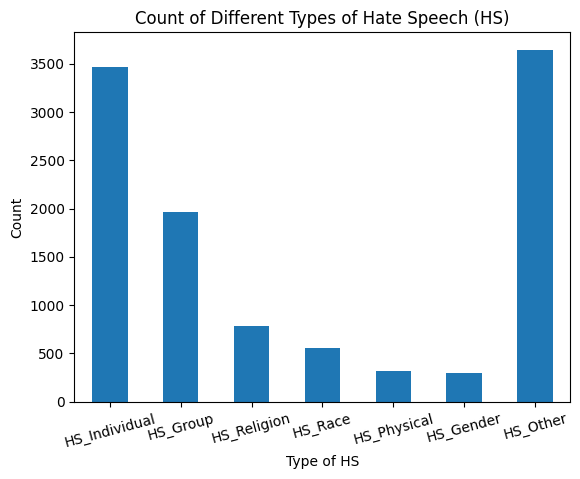

In [21]:
# Count of Different Types of Hate Speech (HS)

hs_count.plot(kind='bar', stacked=True)
plt.title('Count of Different Types of Hate Speech (HS)')
plt.xticks(rotation=15)
plt.xlabel('Type of HS')
plt.ylabel('Count')
plt.show()

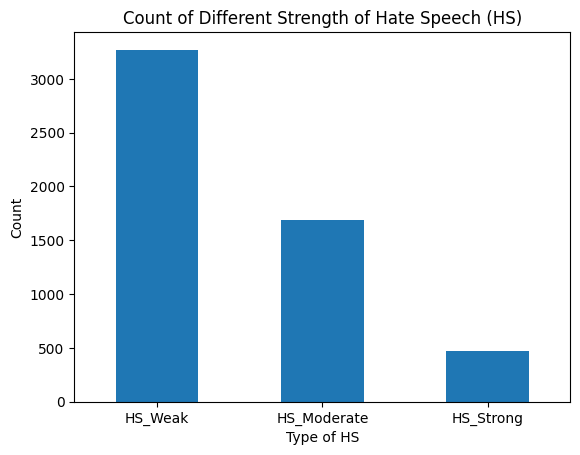

In [18]:
# Count of Different Strength of Hate Speech (HS)

hs_strength_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.title('Count of Different Strength of Hate Speech (HS)')
plt.xlabel('Type of HS')
plt.ylabel('Count')
plt.show()

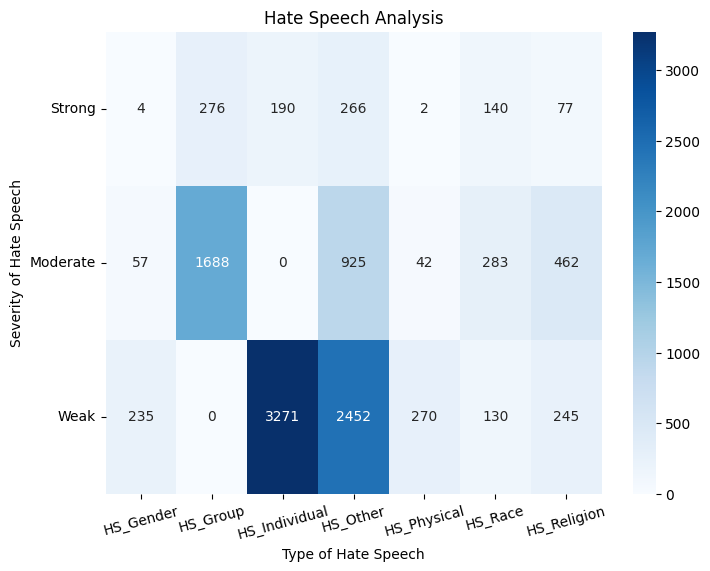

In [30]:
# Heat map distribution

# pivot the DataFrame
pivot_table = pd.pivot_table(dfData, values=['HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other'],
                             index=['HS_Weak', 'HS_Moderate', 'HS_Strong'], aggfunc='sum')

# Filter the pivot table to exclude the severity 0-0-0
pivot_table = pivot_table.loc[pivot_table.sum(axis=1) > 0]

# Define severity labels
severity_labels = {
    (0, 0, 0): '',
    (0, 0, 1): 'Strong',
    (0, 1, 0): 'Moderate',
    (1, 0, 0): 'Weak'
}

# Replace severity values with labels
pivot_table.index = [severity_labels[tuple(row)] for row in pivot_table.index]

# Map the severity levels using the defined mapping
severity = pivot_table.columns.map(severity_labels).fillna('')

# plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, cmap='Blues', annot=pivot_table, fmt='')
plt.title('Hate Speech Analysis')
plt.xticks(rotation=15)
plt.yticks(rotation=0)
plt.xlabel('Type of Hate Speech')
plt.ylabel('Severity of Hate Speech')
plt.show()

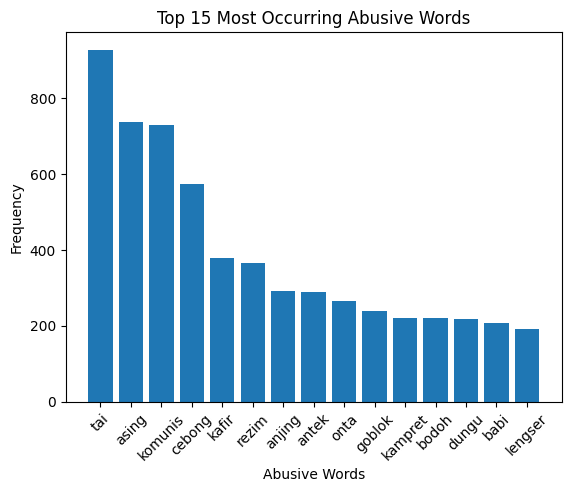

In [35]:
# Top 15 Most Occurring Abusive Words

abusive_dict = dict(sorted(dictAbusive.items(), key=lambda item: item[1], reverse=True))

# sort the dictionary by value in descending order
for tweet in dfData[dfData['HS'] == 1]['Tweet']:
    for word in tweet.split():
        if word.lower() in abusive_dict:
            abusive_dict[word.lower()] += 1

# function to count occurrences of abusive words in a text
def count_abusive_words(text):
    count = 0
    for word in text.lower().split():
        if word in abusive_dict:
            count += abusive_dict[word]
    return count

# add column to DataFrame with the count of abusive words in each text
dfData['abusive_word_count'] = dfData['Tweet'].apply(count_abusive_words)

# sort DataFrame by the count of abusive words in descending order
dfData = dfData.sort_values('abusive_word_count', ascending=False)

# get the top 15 most occurring abusive words
top_15_abusive_words = dfData['Tweet'].str.lower().str.findall('|'.join(abusive_dict.keys())).explode().value_counts().iloc[:15]

# plot bar chart for top 15 abusive words
plt.bar(top_15_abusive_words.index, top_15_abusive_words.values)
plt.title('Top 15 Most Occurring Abusive Words')
plt.xticks(rotation=45)
plt.xlabel('Abusive Words')
plt.ylabel('Frequency')
plt.show()